In [5]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
path_to_csv = './mlcourse_open_first_survey_parsed.csv'
df = pd.read_csv(path_to_csv, index_col='id')
rename_dic = dict(zip(df.columns, [
    'time', 'intro', 'jupyter', 'expect', 'sport',
    'personal', 'math_level', 'quest1', 'quest2', 'quest3',
    'fib_gen', 'python', 'github', 'movie'
]))
df.rename(columns=rename_dic, inplace=True)

In [7]:
df.head(2)

time  \
id                                 
0   2016/12/05 10:39:59 am GMT+3   
1   2016/12/05 10:44:27 am GMT+3   

                                                intro jupyter  \
id                                                              
0                                    крутой Developer      Да   
1   Разработчик Navision. Изучаю тему DS для возмо...      Да   

                                               expect      sport personal  \
id                                                                          
0   Ребята, вижу ваш настрой, уверен курс будет ин...  Starcraft       Да   
1   Практики, подкрепленной теорией. Хочется упоря...        NaN       Да   

    math_level quest1 quest2  quest3          fib_gen python  \
id                                                             
0            4      3    -12     2.0               Да     Да   
1            1      3    NaN     2.0  Да, но фиговый.     Да   

                    github                                              movie  
id                                                                             
0                     Проф  Прочитай книгу Лема "Голос Неба", очень много ...  
1   Могу скачать материалы                                                NaN

In [8]:
df['jupyter'].value_counts().head()

Да             2071
Нет             766
немного           7
Немного           3
Да, но мало       2
Name: jupyter, dtype: int64

In [9]:
replaced = {'да': 1, 'нет': 0}
jupyter_levels = df['jupyter'].apply(
    lambda x: replaced[str(x).lower()] if str(x).lower() in replaced else 2
).fillna(2)

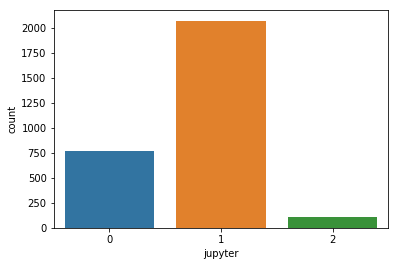

In [10]:
sns.countplot(jupyter_levels);

In [11]:
df[df['quest3'] == 2].shape[0] / df['quest3'].dropna().shape[0]

0.9244036697247706

In [12]:
# import nltk - обработка текстов
all_words = np.concatenate(df['intro'].apply(lambda x: x.strip().lower().split()).values)
#pd.Series(all_words).value_counts()